## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
research_combined = pd.merge(study_results,mouse_metadata,how ="left", on = "Mouse ID")

# Display the data table for preview
research_combined.head(15)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the initial number of mice.
research_combined['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = research_combined.loc[research_combined.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
research_combined.loc[research_combined['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean = research_combined.loc[research_combined['Mouse ID'] != 'g989']

In [6]:
# Check the new number of mice
mice_clean['Mouse ID'].nunique()

248

In [7]:
mice_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

grouped_df = mice_clean.groupby(["Drug Regimen"])

MeanTumorVolume = grouped_df["Tumor Volume (mm3)"].mean()
MeanTumorVolume_df = pd.DataFrame(MeanTumorVolume)
MeanTumorVolume_df = MeanTumorVolume_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

MedianTumorVolume = grouped_df["Tumor Volume (mm3)"].median()
MedianTumorVolume_df = pd.DataFrame(MedianTumorVolume)
MedianTumorVolume_df = MedianTumorVolume_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

TumorVolumeVariance = grouped_df["Tumor Volume (mm3)"].var()
TumorVolumeVariance_df = pd.DataFrame(TumorVolumeVariance)
TumorVolumeVariance_df = TumorVolumeVariance_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})

TumorStandardDiviation = grouped_df["Tumor Volume (mm3)"].std()
TumorStandardDiviation_df = pd.DataFrame(TumorStandardDiviation)
TumorStandardDiviation_df = TumorStandardDiviation_df.rename(columns={"Tumor Volume (mm3)": "Tumor Standard Diviation"})

TumorStandardError = grouped_df["Tumor Volume (mm3)"].sem()
TumorStandardError_df = pd.DataFrame(TumorStandardError)
TumorStandardError_df = TumorStandardError_df.rename(columns={"Tumor Volume (mm3)": "Tumor Standard Error"})

merge1 = pd.merge(MeanTumorVolume_df, MedianTumorVolume_df, how='outer', on='Drug Regimen')
merge2 = pd.merge(merge1, TumorVolumeVariance_df, how='outer', on='Drug Regimen')
merge3 = pd.merge(merge2, TumorStandardDiviation_df, how='outer', on='Drug Regimen')
merge_final = pd.merge(merge3, TumorStandardError_df, how='outer', on='Drug Regimen')

merge_final


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Standard Diviation,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

grouped_final = grouped_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
grouped_final


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

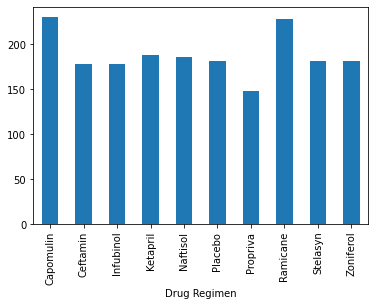

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug = grouped_df["Tumor Volume (mm3)"].count()
mice_per_drug.plot(kind='bar')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

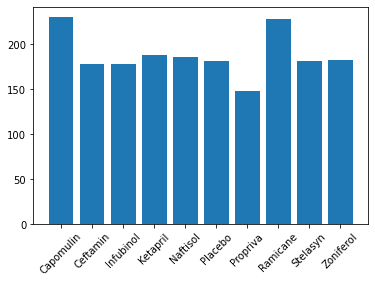

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_per_drug.index, mice_per_drug)
plt.xticks(rotation=45)


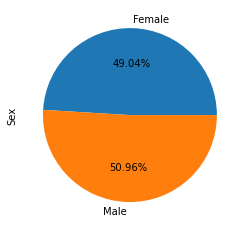

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mice_clean.groupby(["Sex"])
mice_sex = sex_df["Sex"].count()
mice_sex.plot(kind='pie',autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x170136457f0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.04%'),
  Text(-0.018044734954153905, -0.5997285948997549, '50.96%')])

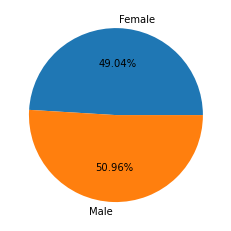

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, autopct='%.2f%%',labels=mice_sex.index)


## Quartiles, Outliers and Boxplots

In [14]:
df = mice_clean.groupby('Mouse ID').max()
df.loc[df.index=='b879']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b879,45,72.555239,2,Stelasyn,Female,4,26


In [15]:
mice_clean.loc[mice_clean['Mouse ID']== 'f932']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.0,0,Ketapril,Male,15,29


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mice_clean.groupby('Mouse ID').Timepoint.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = mice_clean.merge(max_timepoint, on=['Mouse ID','Timepoint'])

# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumors = []

for drug in drugs:
    final_tumor = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumors.append(final_tumor)
    quartiles = final_tumor.quantile([.25, .50, .75])
    quartiles = pd.DataFrame(quartiles)
    tumors = pd.DataFrame(tumors)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq = final_tumor.quantile([0.25]).mean()
upperq = final_tumor.quantile([0.75]).mean()
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# A high IQR determines that we do have outliers in the data across a calculation of all 4 drug regimens
print(f"The lower quartile of tumors in mice is: {lowerq}")
print(f"The upper quartile of tumors in mice is: {upperq}")
print(f"The interquartile range of tumors in mice is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumors in mice is: 48.72207785
The upper quartile of tumors in mice is: 64.29983003
The interquartile range of tumors in mice is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

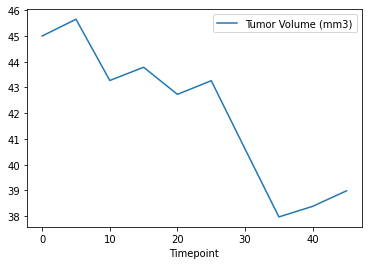

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_clean.loc[mice_clean['Mouse ID']== 'b128'].plot(x='Timepoint', y='Tumor Volume (mm3)')


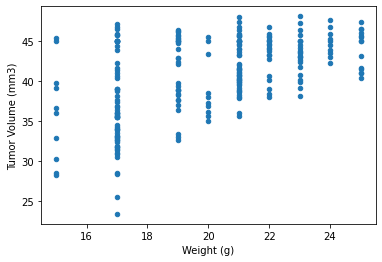

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_clean.loc[mice_clean['Drug Regimen']== 'Capomulin'].plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')


## Correlation and Regression

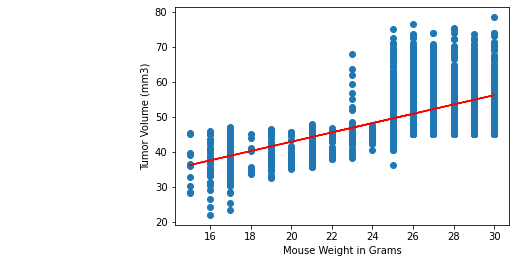

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mice_clean['Weight (g)']
y_values = mice_clean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
